<a href="https://colab.research.google.com/github/rbarman/AnimeGANs/blob/master/Face_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
import torch
from torchvision.utils import make_grid, save_image
from IPython.display import Image as display_image

In [1]:
!git clone https://github.com/rbarman/AnimeGANs

Cloning into 'AnimeGANs'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 57 (delta 23), reused 11 (delta 3), pack-reused 0
Unpacking objects: 100% (57/57), done.


In [2]:
%cd AnimeGANs/

/content/AnimeGANs


In [13]:
from my_modules import Generator

In [6]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
generator = Generator(100,64)
generator.load_state_dict(torch.load('/content/drive/My Drive/generator',map_location=torch.device('cpu')))
generator.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTransposeBlock(
      (main): Sequential(
        (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (4): ConvTransposeBlock(
      (main): Sequential(
        (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (5): ConvTransposeBlock(
      (main): Sequential(
        (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): Batc

In [34]:
def generate_image(generator, save_path):

  # TODO: should this func should be part of my_modules.Generator
  # TODO: my_modules.Generator should have self.latent_vector_len
    # we should not hardcode the shape of noise here (100 -> n)
  # TODO: generate n or one image?
  noise = torch.randn(1, 100, 1, 1)
  generated_image = generator(noise)
  save_image(generated_image[0],save_path, normalize=True)

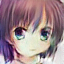

In [46]:
generate_image(generator,'./new.png')
display_image('new.png')